In [1]:
import pandas as pd
import numpy as np
import pyperformance

In [2]:
aliases = {
    "nogil3.9" : "3.9.10-nogil",
    "3.9" : "3.9.18",
    "3.10" : "3.10.13",
    "3.11" : "3.11.8",
    "3.12" : "3.12.2",
    "nogil3.12" : "3.12.0-nogil"
}

In [3]:
df = pd.DataFrame()

In [5]:
_39vs310 = pd.read_csv("./pyperf_res/39vs310.csv")
_39vs311 = pd.read_csv("./pyperf_res/39vs311.csv")
_39vs312 = pd.read_csv("./pyperf_res/39vs312.csv")
_39vsnogil = pd.read_csv("./pyperf_res/39vsnogil.csv")
_39vsnogil312 = pd.read_csv("./pyperf_res/39vsnogil312.csv")

In [6]:
df['Benchmark'] = _39vs310["Benchmark"]

In [7]:
benchmarks = list(df['Benchmark'])

In [8]:
df["3.9.18"] = _39vs310["Base"]

In [9]:
#df["3.9.10-nogil"] = _39vsnogil["Changed"]

In [10]:
df["3.10.13"] = _39vs310["Changed"]

In [11]:
df["3.11.8"] = _39vs311["Changed"]

In [12]:
df["3.12.2"] = _39vs312["Changed"]

In [13]:
nogilbenchmarks = _39vsnogil[['Benchmark','Changed']]
nogilbenchmarks = list(nogilbenchmarks.values.tolist())

In [14]:
for i in range(len(benchmarks)):
    if benchmarks[i] != nogilbenchmarks[i][0]:
        nogilbenchmarks.insert(i, [benchmarks[i],np.nan])

In [15]:
nogilbenchmarks_vals = [row[1] for row in nogilbenchmarks]

In [16]:
df["3.9.10-nogil"] = nogilbenchmarks_vals

In [17]:
nogilbenchmarks = _39vsnogil312[['Benchmark','Changed']]
nogilbenchmarks = list(nogilbenchmarks.values.tolist())

In [18]:
for i in range(len(benchmarks)):
    if benchmarks[i] != nogilbenchmarks[i][0]:
        nogilbenchmarks.insert(i, [benchmarks[i],np.nan])

In [19]:
nogilbenchmarks_vals = [row[1] for row in nogilbenchmarks]

In [20]:
df["3.12.0-nogil"] = nogilbenchmarks_vals

In [21]:
pd.set_option('display.max_rows', 500)

In [22]:
df

,Benchmark,3.9.18,3.10.13,3.11.8,3.12.2,3.9.10-nogil,3.12.0-nogil
0,2to3,4.739100e-01,3.951600e-01,3.113200e-01,3.433800e-01,5.314500e-01,3.095100e-01
1,async_generators,5.833000e-01,5.339400e-01,4.345900e-01,6.152500e-01,7.973200e-01,4.423700e-01
2,async_tree_cpu_io_mixed,1.320000e+00,1.100000e+00,9.407500e-01,8.768200e-01,8.973000e-01,8.757400e-01
3,async_tree_eager,9.427100e-01,8.221500e-01,6.080700e-01,1.449700e-01,5.188800e-01,6.208700e-01
4,async_tree_eager_cpu_io_mixed,1.320000e+00,1.110000e+00,9.459800e-01,5.048900e-01,8.851500e-01,8.825100e-01
5,async_tree_eager_io,2.220000e+00,1.920000e+00,1.390000e+00,1.410000e+00,1.130000e+00,1.390000e+00
6,async_tree_eager_memoization,1.140000e+00,1.000000e+00,7.378400e-01,3.338700e-01,6.375600e-01,7.456200e-01
7,async_tree_io,2.190000e+00,1.920000e+00,1.400000e+00,1.300000e+00,1.130000e+00,1.390000e+00
8,async_tree_memoization,1.140000e+00,1.010000e+00,7.359200e-01,7.156500e-01,6.382700e-01,7.465300e-01
9,async_tree_none,9.316400e-01,8.246200e-01,6.061500e-01,5.747500e-01,5.248700e-01,6.205700e-01


In [23]:
import matplotlib.pyplot as plt
import random

In [24]:
def get_graph(cols, savefig=False):
    
    plt.figure(figsize=(25,6))
    columns = list(df.columns[1:])
    
    colors = "blue,red,orange,magenta".split(",")
    for col in cols:
        vals = list(df[aliases[col]].astype(float))
        random.shuffle(colors)
        plt.plot(list(range(94)), vals, color=colors.pop())
        
    plt.ylabel("Duration of benchmark")
    plt.xlabel("Benchmark")
    legend = cols.copy()
    plt.legend(legend)
    plt.xlim((0,94))
    ticks = [i for i in range(94)]
    plt.xticks(ticks, benchmarks, rotation=-90)
    if savefig:
        cols.reverse()
        plt.savefig(f"./images/{'_'.join(cols)}.png", bbox_inches='tight',transparent=False, pad_inches=0.1)
    plt.show()

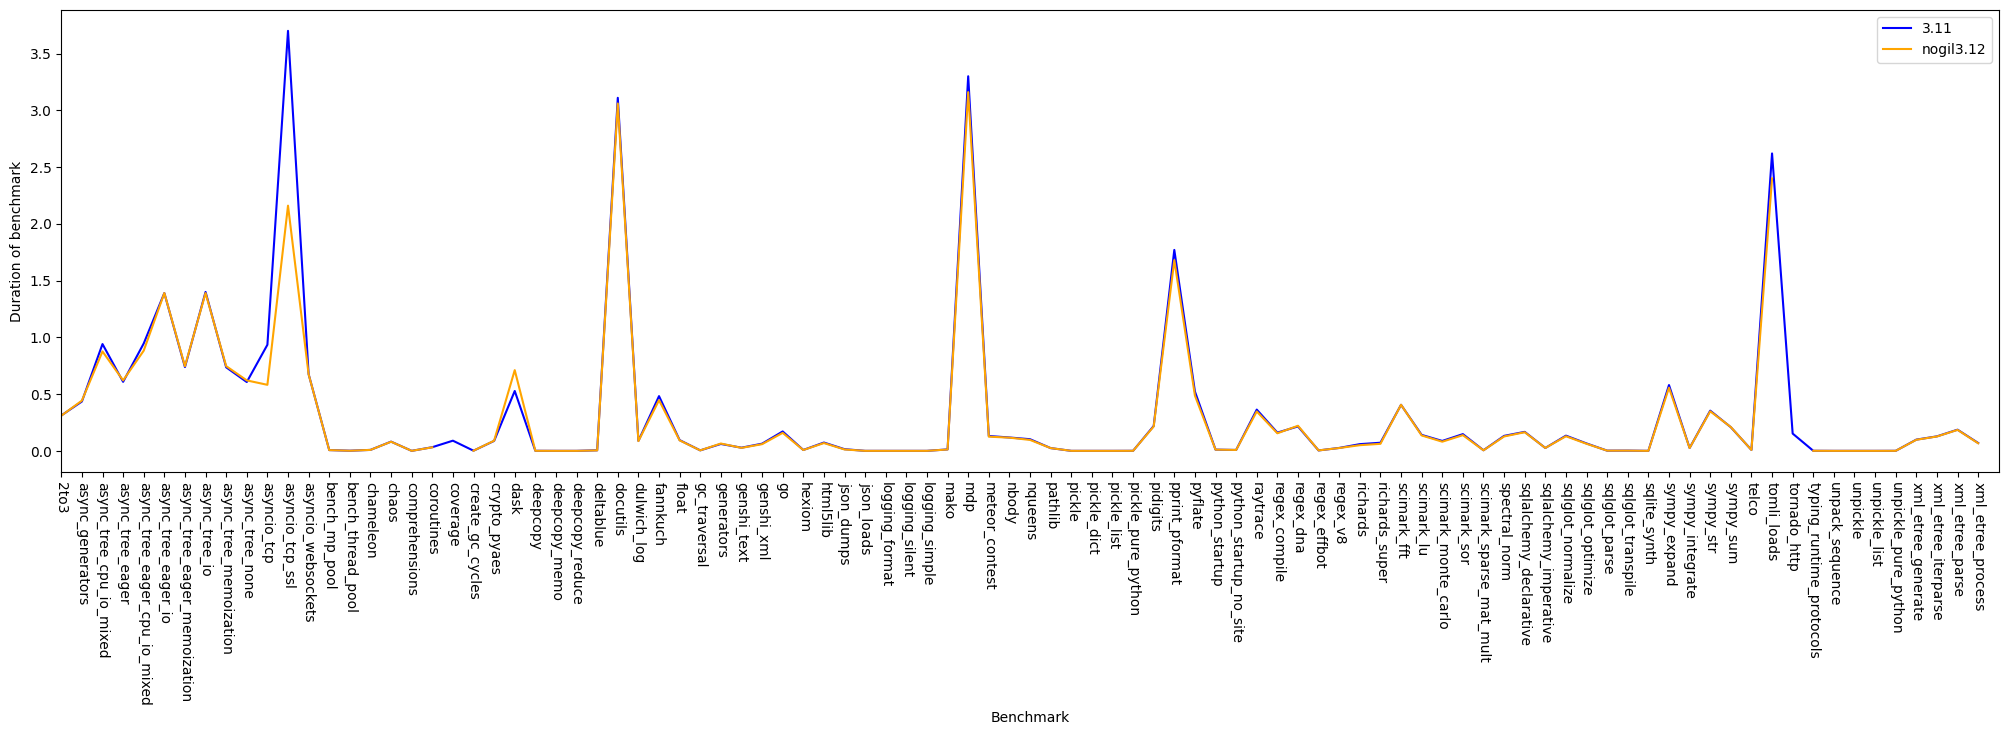

In [27]:
get_graph(['3.11','nogil3.12'], True)

## Compute avg time difference

In [55]:
times = []

In [56]:
_39_time = np.sum(df[aliases['3.9']])
_39_avg_time = _39_time / 94
times.append(_39_avg_time)

In [57]:
nogil39_time = np.sum(df[aliases['nogil3.9']])
nogil39_avg_time = nogil39_time / len(_39vsnogil.index)
times.append(nogil39_avg_time)

In [58]:
_310_time = np.sum(df[aliases['3.10']])
_310_avg_time = _310_time / 94
times.append(_310_avg_time)

In [59]:
_311_time = np.sum(df[aliases['3.11']])
_311_avg_time = _311_time / 94
times.append(_311_avg_time)

In [60]:
_312_time = np.sum(df[aliases['3.12']])
_312_avg_time = _312_time / 94
times.append(_312_avg_time)

In [61]:
nogil312_time = np.sum(df[aliases['nogil3.12']])
nogil312_avg_time = nogil312_time / len(_39vsnogil312.index)
times.append(nogil312_avg_time)

In [62]:
times

[0.46063743155478715,
 0.4305711935422221,
 0.40484014113308514,
 0.33318994519372336,
 0.313467691597766,
 0.3103704309958696]

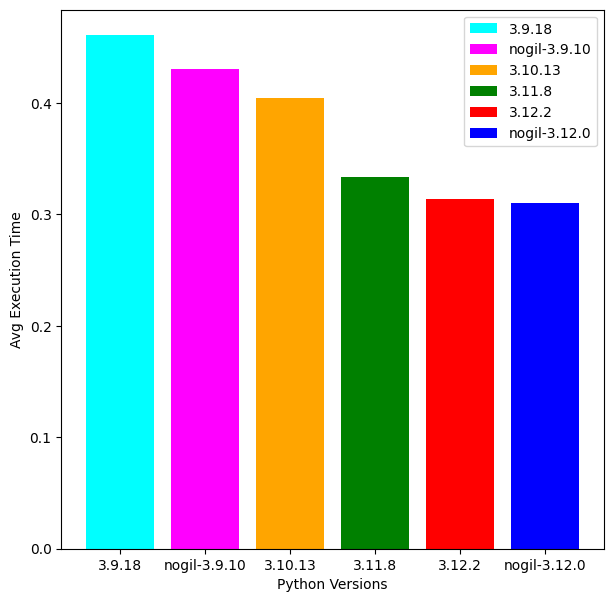

In [88]:
plt.figure(figsize=(7,7))
labels = ['3.9.18','nogil-3.9.10','3.10.13','3.11.8','3.12.2','nogil-3.12.0']

colors = "blue,red,green,orange,magenta,cyan".split(",")
for i in range(len(labels)):
    plt.bar(i, times[i], color=colors.pop())
plt.xlabel("Python Versions")
plt.ylabel("Avg Execution Time")
plt.legend(labels)
ticks = [i for i in range(len(times))]
plt.xticks(ticks, labels=labels)
plt.show()